# **Exploratory Data Analysis on Titanic Dataset**
In this notebook, I perform an exploratory data analysis (EDA) on the Titanic dataset from Kaggle. The goal is to uncover patterns related to survival, explore feature relationships, and clean the data for potential modeling.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the Data**  
The dataset is loaded from a CSV file. Let's take a quick look at the first few records.

In [60]:
df = pd.read_csv('/content/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Dataset Overview**

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [62]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


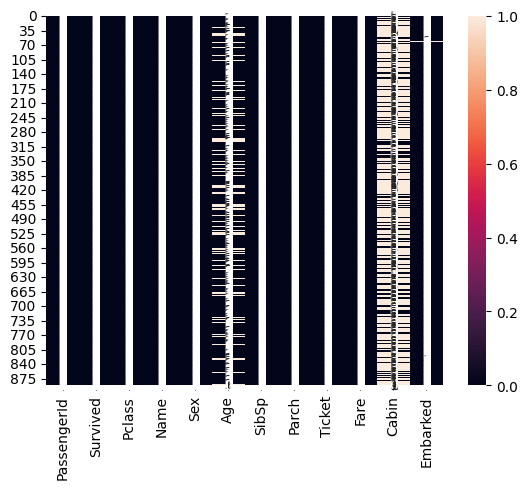

In [63]:
sns.heatmap(df.isnull(), annot=True)
plt.show()

**Handling Missing Data**  
Missing values in the Age column are filled with the mean age.

The Cabin column is dropped due to a high number of missing values.

Remaining missing values are removed by dropping the corresponding rows.

In [64]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

/tmp/ipython-input-64-1698716155.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [65]:
df.drop(columns=['Cabin'], axis=1, inplace=True)

In [66]:
df.dropna(inplace=True, axis=0)

**Data After Cleaning**  
Let's re-check the dataset to ensure all missing values have been handled.

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


**Unique Value Counts**

In [68]:
df.nunique()

,0
PassengerId,889
Survived,2
Pclass,3
Name,889
Sex,2
Age,89
SibSp,7
Parch,7
Ticket,680
Fare,247


**Converting Columns to Categorical Type**  
To optimize memory and clarify data types, we convert appropriate columns to categorical types.

In [69]:
df['Embarked'] = pd.Categorical(df['Embarked'])
df['Pclass'] = pd.Categorical(df['Pclass'])
df['Sex'] = pd.Categorical(df['Sex'])

**Statistical Summary**  
describe() gives us basic statistical insights into the dataset.

In [70]:
df.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,29.653446,0.524184,0.382452,32.096681
std,256.998173,0.486260,12.968366,1.103705,0.806761,49.697504
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,29.699118,0.000000,0.000000,14.454200
75%,668.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [71]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


**Survival Rate by Gender and Class**  
We compute average survival rates for different groups using groupby() to uncover meaningful patterns.

In [72]:
df.groupby('Sex')['Survived'].mean()

/tmp/ipython-input-72-2851150635.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Sex')['Survived'].mean()


,Survived
Sex,
female,0.740385
male,0.188908


In [73]:
df.groupby('Pclass')['Survived'].mean()

/tmp/ipython-input-73-1143995730.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Pclass')['Survived'].mean()


,Survived
Pclass,
1,0.626168
2,0.472826
3,0.242363


In [74]:
df.groupby(['Sex', 'Pclass'])['Survived'].mean()

/tmp/ipython-input-74-3812082823.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Sex', 'Pclass'])['Survived'].mean()


Sex     Pclass
female  1         0.967391
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

**Visualization: Survival Rate by Gender**  
Females had a significantly higher survival rate than males.

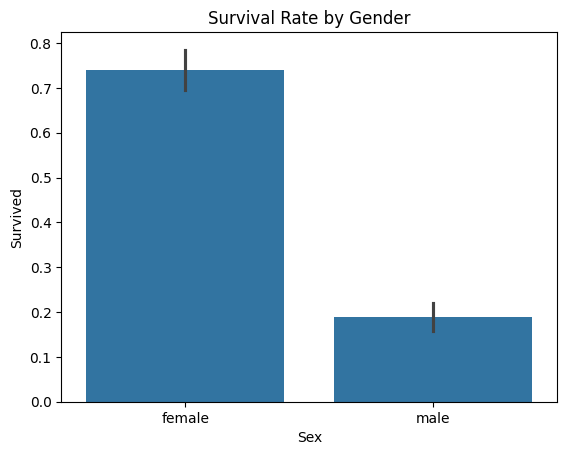

In [75]:
# Bar plot: Survival rate by gender
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

**Visualization: Survival Rate by Passenger Class**  
Passengers in 1st class had the highest survival rates.

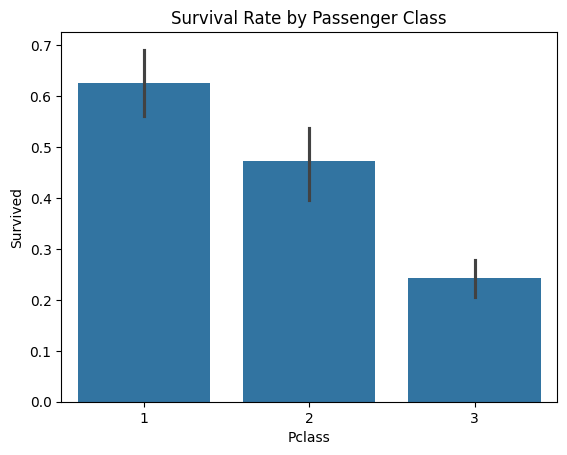

In [76]:
# Bar plot: Survival rate by class
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

**Heatmap: Correlation matrix**

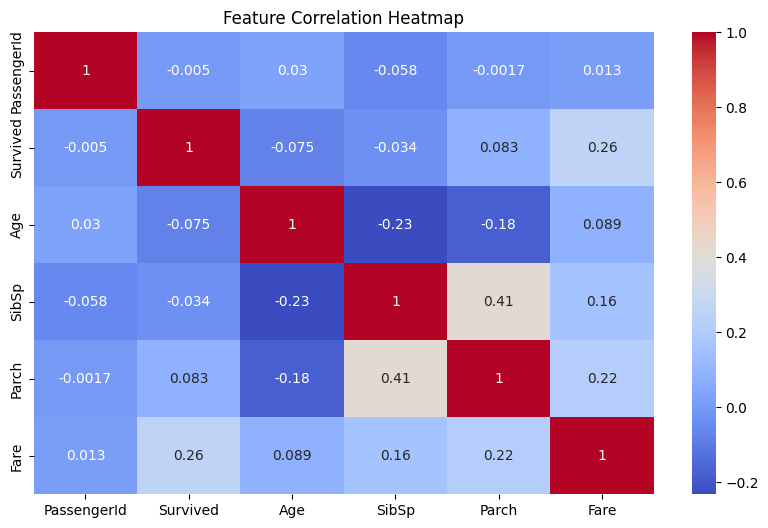

In [79]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

**Fare Distribution: Survived vs Not Survived**  
Passengers who paid higher fares were more likely to survive, possibly due to being in higher classes.

/tmp/ipython-input-78-3416007188.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Survived'] == 1], x='Fare', label='Survived', shade=True)
/tmp/ipython-input-78-3416007188.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Survived'] == 0], x='Fare', label='Did Not Survive', shade=True)


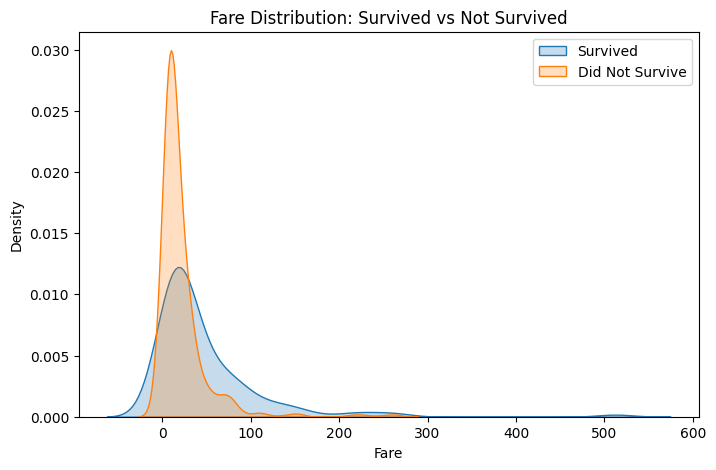

In [78]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df[df['Survived'] == 1], x='Fare', label='Survived', shade=True)
sns.kdeplot(data=df[df['Survived'] == 0], x='Fare', label='Did Not Survive', shade=True)
plt.title("Fare Distribution: Survived vs Not Survived")
plt.xlabel("Fare")
plt.ylabel("Density")
plt.legend()
plt.show()

# **Conclusion**
From this EDA, we found that gender, passenger class, and fare were strong indicators of survival. Females and 1st class passengers had higher survival rates. This analysis lays the foundation for building predictive models.